In [1]:
# import the necessary packages

#--- nhiệm tìm hiểu thêm xem các thư viện này làm nhiệm vụ gì --- 

#được sử dụng để mở rộng tập dữ liệu đào tạo nhằm cải thiện hiệu suất và khả năng tổng quát hóa của mô hình
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input # tạo model
from tensorflow.keras.models import Model # định nghĩa mô hình theo mô hình tuần tự
from tensorflow.keras.optimizers import Adam #tối ưu hóa ( tìm hiểu từ sgd đến adam)
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # free train model*
from tensorflow.keras.preprocessing.image import img_to_array # chuyển về dạng tensor
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
#chia tập train test và đưa ra report
from sklearn.preprocessing import LabelBinarizer # * chuyển nhãn về nhị phân
from sklearn.model_selection import train_test_split # chia tập dữ liệu theo train 8 test 2
from sklearn.metrics import classification_report # khó quá bỏ qua
from imutils import paths
import matplotlib.pyplot as plt #thư viện để vẽ đồ thị
import numpy as np #Thư viện đại số tuyến tính
import os

In [2]:
# khởi tạo learning rate, số epochs cần train và batch size
INIT_LR = 1e-4 # tốc độ học tập
EPOCHS = 20 # số chu kì train
BS = 32 # mỗi lần đưa vào mô hình 32 ảnh, chỉ số cao thì hội tụ nhanh

In [3]:
DIRECTORY = r"D:\AI\Face\2\data" # path vị trí lưu datasheet
CATEGORIES = ["mask", "no_mask"] # có 2 loại data để train là mask và no_mask
# lấy danh sách hình ảnh trong thư mục tập dữ liệu, sau đó khởi tạo danh sách dữ liệu 
#(tức là hình ảnh) và hình ảnh lớp

[INFO] loading images...


In [4]:
data = [] # mảng dữ liệu
labels = [] # mảng nhãn dữ liệu

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

        # init input output 

In [5]:
data

[array([[[-0.5529412 , -0.5058824 , -0.7254902 ],
         [-0.6392157 , -0.5764706 , -0.7647059 ],
         [-0.654902  , -0.58431375, -0.7490196 ],
         ...,
         [-0.6784314 , -0.654902  , -0.8039216 ],
         [-0.75686276, -0.7254902 , -0.9372549 ],
         [-0.7176471 , -0.6784314 , -0.85882354]],
 
        [[-0.6       , -0.5529412 , -0.75686276],
         [-0.64705884, -0.58431375, -0.77254903],
         [-0.6392157 , -0.5686275 , -0.73333335],
         ...,
         [-0.49019605, -0.4588235 , -0.5764706 ],
         [-0.8039216 , -0.7647059 , -0.94509804],
         [-0.70980394, -0.64705884, -0.827451  ]],
 
        [[-0.62352943, -0.5764706 , -0.78039217],
         [-0.6392157 , -0.5764706 , -0.7647059 ],
         [-0.62352943, -0.5529412 , -0.7176471 ],
         ...,
         [-0.6       , -0.5529412 , -0.6627451 ],
         [-0.827451  , -0.7647059 , -0.94509804],
         [-0.7019608 , -0.6313726 , -0.78039217]],
 
        ...,
 
        [[-0.5294118 , -0.4352941 

In [6]:
labels

['mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 'mask',
 

In [7]:
# thực hiện mã hóa một lần trên các nhãn
# định nghĩa cách đưa mảng vào mô hình
# convert về tensor
# chia tập train test

lb = LabelBinarizer() # mã hóa label về nhị phân
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [8]:
trainX.shape
# data

(1100, 224, 224, 3)

In [9]:
testX.shape

(276, 224, 224, 3)

In [10]:
trainY.shape
# label

(1100, 2)

In [11]:
testY.shape

(276, 2)

In [12]:
# xây dựng quá trình tạo hình ảnh train để tăng dữ liệu
# học xử lý ảnh => bỏ qua, ko biết
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [13]:
# tải mạng MobileNetV2, đảm bảo các tập hợp lớp FC đầu được tắt
# dùng pretrain trên tập imagenet
# imagenet => tìm hiểu lịch sử
baseModel = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

9406464/9406464 [==============================] - 0s 0us/step


In [14]:
# xây dựng phần đầu của mô hình sẽ được đặt trên đầu của mô hình cơ sở
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [15]:
# đặt mô hình đầu FC lên trên mô hình cơ sở (trở thành mô hình thực tế để train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [16]:
# lặp qua tất cả các lớp trong mô hình cơ sở và đóng băng chúng để chúng sẽ không được cập nhật 
# trong quá trình đào tạo đầu tiên
for layer in baseModel.layers:
    layer.trainable = False

In [17]:
# hoàn thành model, định nghĩa hàm tối ưu hóa
# *binary_crossentropy là gì
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] compiling model...


C:\Users\ngocd\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
# train the head of the network

H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

[INFO] training head...
Epoch 1/20
34/34 [==============================] - 23s 575ms/step - loss: 0.5431 - accuracy: 0.7837 - val_loss: 0.2746 - val_accuracy: 0.9638
Epoch 2/20
34/34 [==============================] - 19s 542ms/step - loss: 0.2329 - accuracy: 0.9654 - val_loss: 0.1296 - val_accuracy: 0.9855
Epoch 3/20
34/34 [==============================] - 21s 606ms/step - loss: 0.1368 - accuracy: 0.9775 - val_loss: 0.0784 - val_accuracy: 0.9855
Epoch 4/20
34/34 [==============================] - 18s 540ms/step - loss: 0.0835 - accuracy: 0.9888 - val_loss: 0.0576 - val_accuracy: 0.9855
Epoch 5/20
34/34 [==============================] - 18s 538ms/step - loss: 0.0686 - accuracy: 0.9897 - val_loss: 0.0452 - val_accuracy: 0.9855
Epoch 6/20
34/34 [==============================] - 19s 546ms/step - loss: 0.0565 - accuracy: 0.9916 - val_loss: 0.0346 - val_accuracy: 0.9928
Epoch 7/20
34/34 [==============================] - 18s 542ms/step - loss: 0.0471 - accuracy: 0.9925 - val_loss: 0.029

In [19]:
# make predictions on the testing set
# lấy kq dự 
predIdxs = model.predict(testX, batch_size=BS)

[INFO] evaluating network...
9/9 [==============================] - 5s 413ms/step


In [20]:
# đối với mỗi hình ảnh trong bộ thử nghiệm, chúng ta cần tìm chỉ số của label 
# với xác suất dự đoán lớn nhất tương ứng
predIdxs = np.argmax(predIdxs, axis=1)

In [22]:
# serialize the model to disk, saving mask detector model
model.save("model.model", save_format="h5")

[INFO] saving mask detector model...


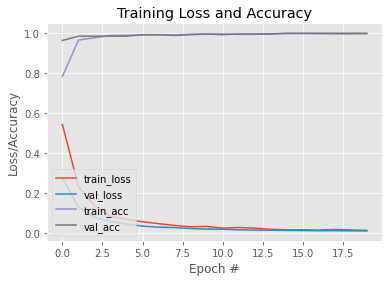

In [23]:
#########################################################################
# đồ thị training loss and accuracy (độ chính xác)
##### tách thành 2 cái
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")